# Engagement Analysis

## Importing necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset

In [2]:
data=pd.read_csv('climate_nasa.csv')

### Conver 'date' to datetime format

In [3]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

### Filling missing values in 'commentCount' with 0

In [4]:
data['commentsCount'].fillna(0, inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_5040\783920751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['commentsCount'].fillna(0, inplace=True)


### Drop rows with missing values

In [5]:
data=data.dropna(subset=['text'])

### Aggregate data to show total like and comments per day

In [7]:
# Group the data by the date (ignoring the time part)
# Aggregate the sum of 'likesCount' and 'commentsCount' for each date
engagement_trends = data.groupby(data['date'].dt.date).agg({
    'likesCount': 'sum',       # Sum of likes for each date
    'commentsCount': 'sum'     # Sum of comments for each date
}).reset_index()               # Reset the index to get a clean DataFrame

## Plot engagement treds over the time

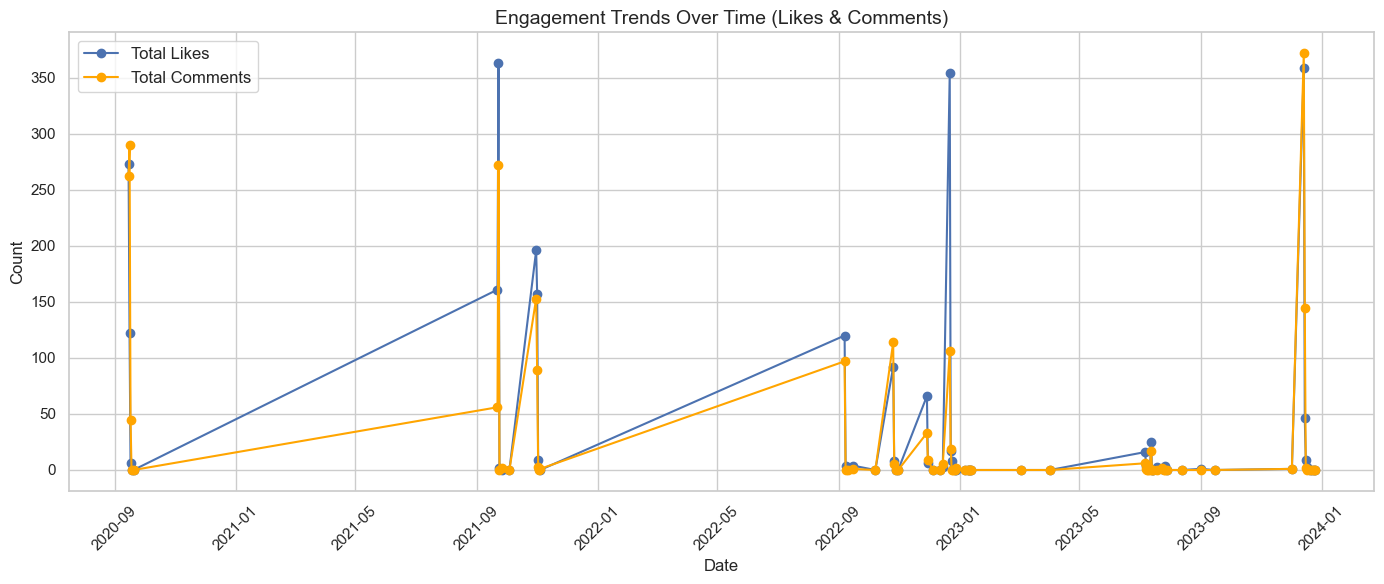

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.plot(engagement_trends['date'], engagement_trends['likesCount'], label='Total Likes', marker='o')
plt.plot(engagement_trends['date'], engagement_trends['commentsCount'], label='Total Comments', marker='o', color='orange')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Engagement Trends Over Time (Likes & Comments)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()